## ES-335 Prerequisite Test

#### Q(1)

=> In Matrix Multiplication, every element of ith row of the first matrix is multiplied with every corresponding element of jth column of the second matrix and after adding them the result is written down in the ith row and jth column of the resultant matrix.

The matrix multiplication between a (n,k) and (k,m) matrix will take
$k * m * n$ multiplications as there are k multiplications when a single row and column are multiplied as this has to be done for n rows of 1st matrix and m columns of second matrix, and there are total of n rows in first matrix and m columns in second matrix. For adding the results we will require $(k-1) * m * n$ additions.

#### Q(2)

In [1]:
import numpy as np
A = np.random.randint(1,20, size= (100, 95))
B = np.random.randint(1,20, size= (95, 183))

In [2]:
import time
def Mat_Mul(A,B):
    n = A.shape[0]
    k = A.shape[1]
    m = B.shape[1]
    C = np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            for _ in range(k):
                C[i,j] += A[i,_]*B[_,j]
    return C

%time C = Mat_Mul(A,B)

CPU times: total: 562 ms
Wall time: 1.51 s


In [3]:
A1 = np.matrix(A)
B1 = np.matrix(B)

%time C1 = np.matmul(A1,B1)

CPU times: total: 0 ns
Wall time: 6.32 ms


Time Taken by numpy's matmul is less than what we got from the normal matrix multiplication using for loops. This is because numpy uses vectorization which allows it to multiply the single row in a single operation, drastically reducing time for large sized arrays. Also numpy is C implementation which is much faster than python implementation.

#### Q(3)

If the size of the array is 'n'. Then, this particular algorithm will take $O(n * n/2)$ time, which is equal to $O(n^2)$.

The better approach will be sorting the array first and then getting the middle element of the array. We can use different sorting algorithms which can sort the array in less than $O(n)$ time such as merge sort, quick sort, etc.

##### Python Code for both the approaches is as follows:

In [4]:
def find_median(l):
    n = len(l)
    for i in range((n+1)//2):
        num = l[0]
        k = 0
        for j in range(n):
            if num < l[j]:
                num = l[j]
                k = j
        l[k],l[n-1] = l[n-1],l[k]
        n -= 1
    if len(l)%2 == 1:
        median = num
    else:
        num2 = l[0]
        for j in range(n):
            if num2 < l[j]:
                num2 = l[j]
        median = (num + num2)/2
    return median

np.random.seed(938)
arr = np.random.randint(8,100, size= 10000)

%time med1 = find_median(arr.copy())

print(f"Median calculated by given method: {med1}")

CPU times: total: 3.7 s
Wall time: 5.44 s
Median calculated by given method: 53.0


In [5]:
import time
t1 = time.time()
arr2 = sorted(arr.copy())
n = len(arr2)
if n%2 == 0:
    med2 = (arr2[n//2 - 1] + arr2[n//2])/2
else:
    med2 = arr2[n//2]
t2 = time.time()

print(f"Median calculated using sorted array: {med2}\nTime Taken: {t2-t1}")

Median calculated using sorted array: 53.0
Time Taken: 0.006783962249755859


In [6]:
%time med3 = np.median(arr.copy())

print(f"Median calculated by np.median: {med3}")

CPU times: total: 0 ns
Wall time: 0 ns
Median calculated by np.median: 53.0


numpy.median is taking lesser time than both the given approach and suggested approach this is because the numpy's median is optimised and implemented in C which makes it work fasted than python implementation that we have used.

#### Q(4)
Given $f = x^2y + y^3sin(x)$

While calculating the gradient wrt. a variable we consider any other variable as constant and then differentiate as usual:

Therefore the gradient wrt. x will be:

$\frac{\partial(f)}{\partial(x)} = 2xy + y^3cos(x)$

and the gradient wrt. y will be:

$\frac{\partial(f)}{\partial(y)} = x^2 + 3y^2sin(x)$

#### Q(5)

In [7]:
import jax.numpy as jnp
from jax import grad

def f(x,y):
    return x**2*y + y**3*jnp.sin(x)
grad_wrt_x = grad(f)
grad_wrt_y = grad(f, argnums=1)

def grad_x(x,y):
    return 2*x*y + y**3*jnp.cos(x)
def grad_y(x,y):
    return x**2 + 3*y**2*jnp.sin(x)

print(f"Gradient wrt x at (7.6,5.3): {grad_x(7.6,5.3)}")
print(f"Gradient wrt x at (7.6,5.3) using jax: {grad_wrt_x(7.6,5.3)}")
print(f"Gradient wrt y at (7.6,5.3): {grad_y(7.6,5.3)}")
print(f"Gradient wrt y at (7.6,5.3) using jax: {grad_wrt_y(7.6,5.3)}")

print(f"\nGradient wrt x at (9.1,3.0): {grad_x(9.1,3.)}")
print(f"Gradient wrt x at (9.1,3.0) using jax: {grad_wrt_x(9.1,3.)}")
print(f"Gradient wrt y at (9.1,3.0): {grad_y(9.1,3.)}")
print(f"Gradient wrt y at (9.1,3.0) using jax: {grad_wrt_y(9.1,3.)}")

Gradient wrt x at (7.6,5.3): 117.9668197631836
Gradient wrt x at (7.6,5.3) using jax: 117.96682739257812
Gradient wrt y at (7.6,5.3): 139.3265838623047
Gradient wrt y at (7.6,5.3) using jax: 139.3265838623047

Gradient wrt x at (9.1,3.0): 29.011512756347656
Gradient wrt x at (9.1,3.0) using jax: 29.011516571044922
Gradient wrt y at (9.1,3.0): 91.42564392089844
Gradient wrt y at (9.1,3.0) using jax: 91.42564392089844


We got nearly the same results from JAX. Therefore we can say that the gradients that we calculated are correct.

#### Q(6)

In [8]:
from sympy import diff, sin, cos
from sympy.abc import x,y

f = x**2*y + y**3*sin(x)
print("Gradient of f wrt x:")
display(diff(f,x))
print("Gradient of f wrt y:")
display(diff(f,y))

Gradient of f wrt x:


2*x*y + y**3*cos(x)

Gradient of f wrt y:


x**2 + 3*y**2*sin(x)

We got the same gradient expressions from SymPy also.

#### Q(7)

In [9]:
Students_data = {2022:{
                    "Branch1":{
                        1:{
                        "Roll Number":1,
                        "Name":"N1",
                        "Marks":{
                            "Maths":100,"English":70
                             }
                        },
                        2:{}
                    },
                    "Branch2":{
                    }
                },
                2023:{
                    "Branch1":{},
                    "Branch2":{}
                },
                2024:{
                    "Branch1":{},
                    "Branch2":{}
                }}

Students_data[2022]["Branch1"][2]["Roll Number"] = 2
Students_data[2022]["Branch1"][2]["Name"] = "N2"
Students_data[2022]["Branch1"][2]["Marks"] = {}
Students_data[2022]["Branch1"][2]["Marks"]["Maths"] = 90
Students_data[2022]["Branch1"][2]["Marks"]["English"] = 89
Students_data[2022]["Branch2"][1] = {}
Students_data[2022]["Branch2"][1]["Roll Number"] = 3
Students_data[2022]["Branch2"][1]["Name"] = "N3"
Students_data[2022]["Branch2"][1]["Marks"] = {}
Students_data[2022]["Branch2"][1]["Marks"]["Physics"] = 99

def print_data(Std_data):
    for i in Std_data:
        print(f"Year: {i}")
        for j in Std_data[i]:
            print(" "*4,f"Branch: {j}")
            for k in Std_data[i][j]:
                print(" "*8,f"Student: {k}")
                print(" "*12,f"Name: {Std_data[i][j][k]['Name']}")
                print(" "*12,f"Roll Number: {Std_data[i][j][k]['Roll Number']}")
                print(" "*12,"Marks:")
                for m in Std_data[i][j][k]["Marks"]:
                    print(" "*16,m,":",Std_data[i][j][k]["Marks"][m])
                    
print_data(Students_data)

Year: 2022
     Branch: Branch1
         Student: 1
             Name: N1
             Roll Number: 1
             Marks:
                 Maths : 100
                 English : 70
         Student: 2
             Name: N2
             Roll Number: 2
             Marks:
                 Maths : 90
                 English : 89
     Branch: Branch2
         Student: 1
             Name: N3
             Roll Number: 3
             Marks:
                 Physics : 99
Year: 2023
     Branch: Branch1
     Branch: Branch2
Year: 2024
     Branch: Branch1
     Branch: Branch2


#### Q(8)

In [10]:
class StdData:
    def __init__(self):
        self.years = []
        
    def add_year(self,year):
        self.years.append(year)
    
    def print_data(self):
        for year in self.years:
            print("Year=",year.year)
            for branch in year.branches:
                print(" "*4,"Branch=",branch.branch)
                for std in branch.stds:
                    print(" "*8,"Name=",std.name,"Roll Number=",std.roll_no)
                    print(" "*8,"Marks=",std.marks)
            print()

class Year:
    def __init__(self,year):
        self.year = year
        self.branches = []
    
    def add_branch(self,branch):
        self.branches.append(branch)

class Branch:
    def __init__(self,branch):
        self.branch = branch
        self.stds = []
    
    def add_std(self,std):
        self.stds.append(std)

class Std:
    def __init__(self,name,roll_no):
        self.name = name
        self.roll_no = roll_no
        self.marks = {}
    
    def addmarks(self,subject,marks):
        self.marks[subject] = marks

Data = StdData()
_2022 = Year(2022)
b1 = Branch("Branch1")
b2 = Branch("Branch2")
std1 = Std("N1",1)
std1.addmarks("English",70)
std1.addmarks("Maths",96)
b1.add_std(std1)
_2022.add_branch(b1)
_2022.add_branch(b2)

Data.add_year(_2022)
_2023 = Year(2023)
_2023.add_branch(Branch("Branch1"))
_2023.add_branch(Branch("Branch2"))
Data.add_year(_2023)
Data.print_data()

Year= 2022
     Branch= Branch1
         Name= N1 Roll Number= 1
         Marks= {'English': 70, 'Maths': 96}
     Branch= Branch2

Year= 2023
     Branch= Branch1
     Branch= Branch2



#### Q(9)

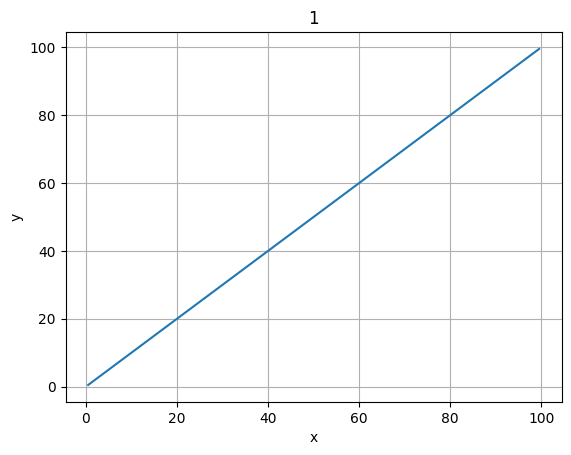

In [11]:
import matplotlib.pyplot as plt
x = np.arange(0.5,100,0.5)

y = x
plt.plot(x,y)
plt.title(1)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

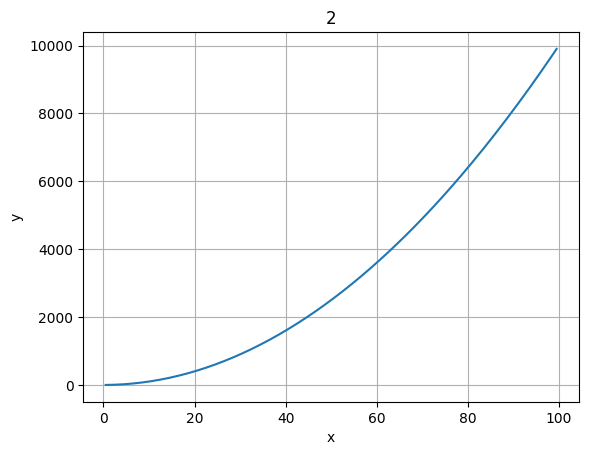

In [12]:
y = x**2
plt.plot(x,y)
plt.title(2)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

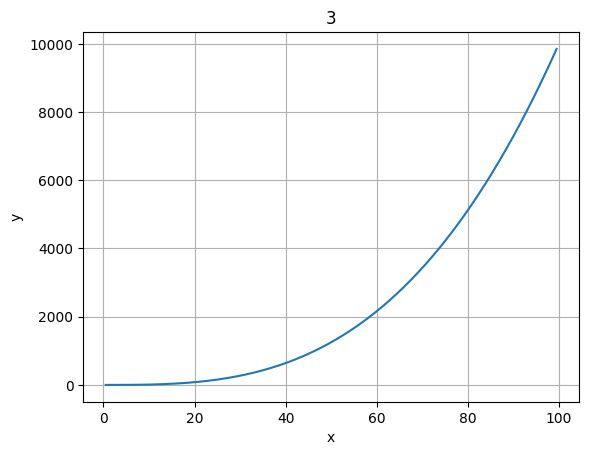

In [13]:
y = x**3/100
plt.plot(x,y)
plt.title(3)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

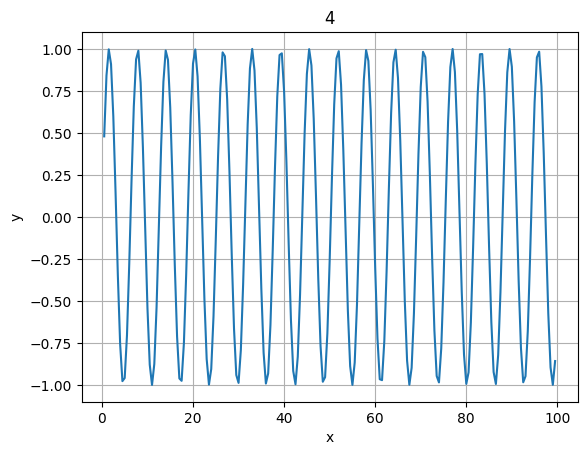

In [14]:
y = np.sin(x)
plt.plot(x,y)
plt.title(4)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

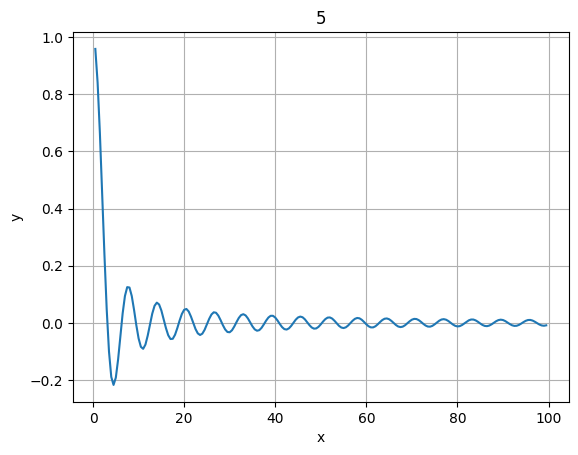

In [15]:
y = np.sin(x)/x
plt.plot(x,y)
plt.title(5)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

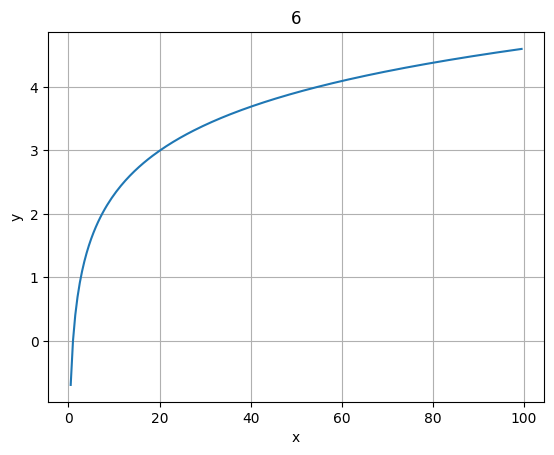

In [16]:
y = np.log(x)
plt.plot(x,y)
plt.title(6)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

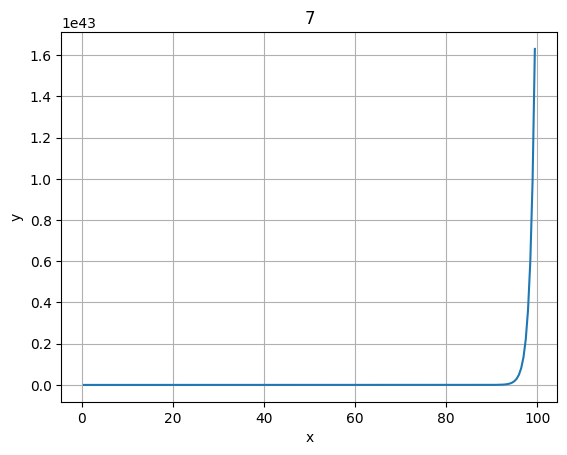

In [17]:
y = np.exp(x)
plt.plot(x,y)
plt.title(7)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

#### Q(10)

In [18]:
Matrix = np.random.uniform(1,2, size=(20,5))
Matrix

array([[1.48285983, 1.85344406, 1.94813832, 1.35762988, 1.66987916],
       [1.15797193, 1.94910575, 1.98671983, 1.08870424, 1.25024018],
       [1.90074894, 1.01746752, 1.6126468 , 1.91007171, 1.87730733],
       [1.48495644, 1.46016962, 1.41873319, 1.50216937, 1.20745494],
       [1.36769305, 1.0697766 , 1.25365906, 1.79932421, 1.92506519],
       [1.37156478, 1.81148958, 1.99832988, 1.56279152, 1.00988495],
       [1.8117506 , 1.51181461, 1.80816404, 1.26613099, 1.04352362],
       [1.68608777, 1.0446638 , 1.80164803, 1.345432  , 1.64410958],
       [1.33657911, 1.17088491, 1.0910716 , 1.93496359, 1.33913402],
       [1.22812087, 1.01327077, 1.11631242, 1.18339331, 1.07184956],
       [1.914026  , 1.30270481, 1.79663626, 1.38458072, 1.15370525],
       [1.22752306, 1.02300819, 1.20530528, 1.90168774, 1.62492246],
       [1.13022501, 1.06741384, 1.92324169, 1.70261631, 1.51278932],
       [1.53390058, 1.4679211 , 1.62215643, 1.60166055, 1.12601043],
       [1.46250917, 1.16683024, 1.

In [19]:
import pandas as pd

Df = pd.DataFrame(Matrix, columns=("a","b","c","d","e"))
display(Df)

idx = Df.std(axis=0).argmax()
idx2 = Df.mean(axis=1).argmin()

print(f"Column with highest Std. Deviation is 'column {Df.columns[idx]}'.")
print(f"Row with lowest mean has index = {idx2}.")

,a,b,c,d,e
0,1.482860,1.853444,1.948138,1.357630,1.669879
1,1.157972,1.949106,1.986720,1.088704,1.250240
2,1.900749,1.017468,1.612647,1.910072,1.877307
3,1.484956,1.460170,1.418733,1.502169,1.207455
4,1.367693,1.069777,1.253659,1.799324,1.925065
5,1.371565,1.811490,1.998330,1.562792,1.009885
6,1.811751,1.511815,1.808164,1.266131,1.043524
7,1.686088,1.044664,1.801648,1.345432,1.644110
8,1.336579,1.170885,1.091072,1.934964,1.339134
9,1.228121,1.013271,1.116312,1.183393,1.071850


Column with highest Std. Deviation is 'column c'.
Row with lowest mean has index = 9.


#### Q(11)

In [20]:
Df["f"] = Df[["a","b","c","d","e"]].sum(axis=1)
Df["g"] = Df["f"].apply(lambda x: "LT8" if x < 8 else "GT8")

count = Df[Df["g"] == "LT8"]["f"].count()
print("Number of rows with value of column g as 'LT8' are",count)

sd_lt8 = Df[Df["g"] == "LT8"]["f"].std()
sd_gt8 = Df[Df["g"] == "GT8"]["f"].std()

print("\nStandard Deviation of rows with value of column g as LT8 is",sd_lt8)
print("\nStandard Deviation of rows with value of column g as GT8 is",sd_gt8)     

Number of rows with value of column g as 'LT8' are 15

Standard Deviation of rows with value of column g as LT8 is 0.5326491175079416

Standard Deviation of rows with value of column g as GT8 is 0.131317653246834


#### Q(12)

In numpy, broadcasting happens when we perform arithmetic operations among arrays with different dimensions or even between arrays and numbers. The smaller array is broadcasted across the larger array such that they have compatible shapes and give a suitable array as an output.

In [21]:
a = np.array([[6,3,8],[7,3,2],[6,8,1]])
b = np.array([9,3,2])
print(f"a = \n{a}\n")
print(f"b = {b}\n")
print(f"a+b = \n{a+b}\n")
print(f"\na*b = \n{a*b}\n")

a = 
[[6 3 8]
 [7 3 2]
 [6 8 1]]

b = [9 3 2]

a+b = 
[[15  6 10]
 [16  6  4]
 [15 11  3]]


a*b = 
[[54  9 16]
 [63  9  4]
 [54 24  2]]



As you can see in this example, both the arrays have different dimensions but still we can perform arithmetic operations among them. The array b is broadcasted and its elements are added/multiplied with all the corresponding elements in the three subarrays of array a. 

In [22]:
b2 = np.array([[5],[1],[8]])
print(f"b2 =\n{b2}\n")
print(f"b+b2 =\n{b+b2}")

b2 =
[[5]
 [1]
 [8]]

b+b2 =
[[14  8  7]
 [10  4  3]
 [17 11 10]]


In this example both the arrays b and b2 increased their dimensions to 3x3 by making the copies of their row and column respectively, and then added to give the final result.

In [23]:
c = 4
print(f"c = {c}\n")
print(f"a/c = {a/c}\n")

c = 4

a/c = [[1.5  0.75 2.  ]
 [1.75 0.75 0.5 ]
 [1.5  2.   0.25]]



In this example we can see that we can perform the arithmetic operations between an array and a number also. All of the numbers in array a are divided by the constant c. 

In [24]:
def argmin(A):
    n = len(A)
    min = A[0]
    for i in range(n):
        if min > A[i]:
            min = A[i]
            idx = i
    return idx

ar = np.random.randint(1,30, size=30)

print("Numpy Array=",ar)
print("\nThe index with minimum element:")
print(f"Using argmin func. = {argmin(ar)}")
print(f"Using np.argmin = {np.argmin(ar)}")

Numpy Array= [ 9 15 16 26 23 17  3 19 29 10  8 24  1  4 19 13 18 29 14  1 10 21 22 26
  8 21 27 27 27 13]

The index with minimum element:
Using argmin func. = 12
Using np.argmin = 12
